<div style="background-color:rgba(100, 160, 200, 0.33);">

<h1>Assignment 3 - Mobile Tracking</h1>

</div>

<p>
    <b>Abstract</b>: Monitor and analyze the mobility of nearby mobile device users, using Wi-Fi probe requests.
</p>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Introduction and outline </h2>

<p>
    We collected our data in various places: Chicago airport, Chicago downtown, Warsaw airport. Since we covered two very different countries, we want to know if there are some differences in the data we collected. First, we will look at the device vendors' frequency. Then, we want to see how many new MAC address appear during the period.
<p>

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Device vendor frequency </h2>


In [56]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

lst = []
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

def get_unique_list(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst.append(row[2])
        return Counter(lst)
    
def create_histogram(list, ven):
    for v in ven:
        for lst in list:
            if lst.startswith(v[0]):
                v[1] += 1
    return ven

def plot_histogram(lst):
    plt.figure(1,figsize=(10,5)) 
    
    y_pos = np.arange(len(lst))
    accesses = [x[1] for x in lst]
    
    plt.bar(y_pos, accesses, align='center', alpha=0.5) 
    plt.xticks(range(len(lst)), [x[0] for x in lst], size='medium')
 
    plt.xlabel('Device Vendor')
    plt.ylabel('# Probe Requests')
    plt.title('Probe requests per device vendor')
    plt.show()


<h3> Chicago Airport Data </h3>

In [57]:
lst_c = get_unique_list('airport_chicago/probe_req.csv')
hist_c = create_histogram(lst_c, vendor)
print(hist_c)

[['Apple', 69], ['Google', 71], ['Samsung', 42], ['LGE', 11], ['HTC', 5], ['Huawei', 2], ['Xiaomi', 2], ['HMD', 1], ['Nest', 3]]


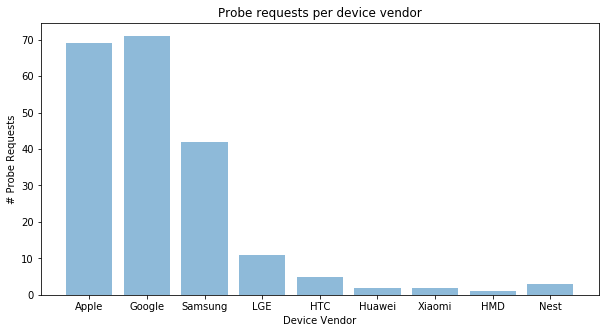

In [58]:
plot_histogram(hist_c)

<h3> Warsaw Airport Data </h3>

In [59]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_w = get_unique_list('airport_warsaw/probe_req.csv')
hist_w = create_histogram(lst_w, vendor)
print(hist_w)

[['Apple', 130], ['Google', 95], ['Samsung', 58], ['LGE', 11], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 3]]


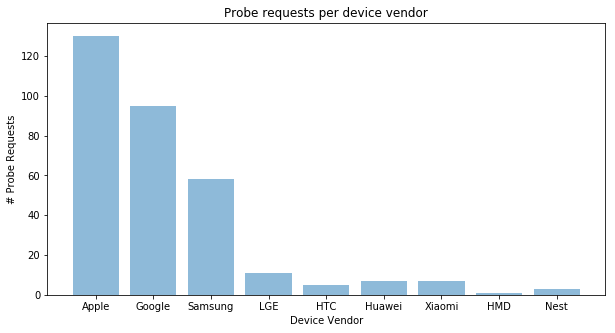

In [60]:
plot_histogram(hist_w)

<h3> Chicago Downtown Dataset </h3>

In [61]:
vendor = [['Apple', 0],
          ['Google', 0],
          ['Samsung', 0],
          ['LGE', 0],
          ['HTC', 0],
          ['Huawei', 0],
          ['Xiaomi', 0],
          ['HMD', 0], 
          ['Nest', 0]]

lst_cd = get_unique_list('downtown_chicago/probe_req.csv')
hist_cd = create_histogram(lst_cd, vendor)
print(hist_cd)

[['Apple', 215], ['Google', 688], ['Samsung', 82], ['LGE', 33], ['HTC', 5], ['Huawei', 7], ['Xiaomi', 7], ['HMD', 1], ['Nest', 7]]


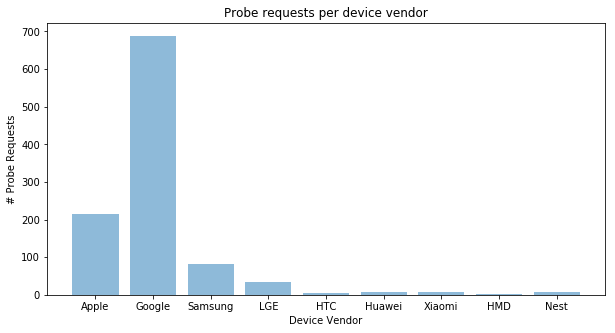

In [62]:
plot_histogram(hist_cd)

<h3> Analysis </h3>

The device vendor distribution is similar in both the captures as infered from the plots. Apple is the single most popular device vendor followed by Google and its Android counterparts. But it somehow doesn't make much sense since we know that the popularity of Google's Pixel/Nexus phone is not comparable to Apple. So we refer to some other resources to check where do these MAC address come from. For example, da:a1:19:XX:XX:XX is marked as Google in the Wireshark and it also shows up in Wireshark database. But we could not find it in IEEE OUI list (http://standards-oui.ieee.org/oui.txt). So we guess some Android phones might have some kind of randomize mechanisms that they are marked Google.

Also, one thing interesting to note is that there is significantly more Android devices on Chicago street than in the airport. I don't want to draw conclusions or infer causality here. But it shows that there are some differences between air travelers and street pedestrians.

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Wildcard or not? </h2>

In [63]:
def get_info_list(file):
    lst_info = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            lst_info.append(row[6])
        return lst_info
    
def isWildcard(list):
    count = 0
    for lst in list:
        if 'Wildcard' in lst: 
            count += 1
    return count    

lst_i_c = get_info_list('airport_chicago/probe_req.csv')
wild_c = isWildcard(lst_i_c)
wildcard_per_c = (wild_c/len(lst_i_c))*100
print("At Chicago airport, " + str(round(wildcard_per_c, 2)) + "% of probe requests are wildcard requests.")

lst_i_w = get_info_list('airport_warsaw/probe_req.csv')
wild_w = isWildcard(lst_i_w)
wildcard_per_w = (wild_w/len(lst_i_w))*100
print("At Warsaw airport, " + str(round(wildcard_per_w, 2)) + "% of probe requests are wildcard requests.")

lst_i_w = get_info_list('downtown_chicago/probe_req.csv')
wild_w = isWildcard(lst_i_w)
wildcard_per_w = (wild_w/len(lst_i_w))*100
print("At Chicago downtown, " + str(round(wildcard_per_w, 2)) + "% of probe requests are wildcard requests.")

At Chicago airport, 78.18% of probe requests are wildcard requests.
At Warsaw airport, 81.25% of probe requests are wildcard requests.
At Chicago downtown, 76.4% of probe requests are wildcard requests.


<h3> Analysis </h3>

#TODO: Any comment on above result?

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Probe Request Analysis </h2>

In [64]:
TIME_INDEX = 1
INFO_INDEX = -1
PROBE_INDEX = 6
MAC_INDEX = 2
import numpy as np

class Analyser:
    def __init__(self):
        self.x = []
        self.y = []

    def readCSV(self, filename):
        file = open(filename, 'r')
        #return  file.readlines()
        return file

    def show(self):
        plt.figure(2,figsize=(20,10)) 
        plt.plot(self.x, self.y)
        #plt.xlabel('Time (seconds)')
        plt.xlabel('Time (5 seconds)')
        plt.ylabel('# devices connected')
        plt.title('Probe requests analysis')
        plt.show()
        plt.show()

    def processData(self):
        pass

class ProbeAnalysis(Analyser):
    def __init__(self, filename):
        super().__init__()
        self.filename = filename
        self.mac = []
        self.wantedList = ["Raspberr_3f:48:74", "Raspberr_76:f1:56", "AVMAudio_42:d6:ff", "Sagemcom_9b:c2:74"]

    def isWildcard(self, inp):
        if len(inp) >= 2 and inp[1] == "Wildcard (Broadcast)":
            return True
        return False
    def processData(self):
        result = {}
        file = self.readCSV(self.filename)
        document = file.readlines()
        size = int(float(document[-1].split(",")[1][1:-1]))//5
        #document = self.readCSV(self.filename)
        #size = int(float(document[-1].split(",")[1][1:-1]))
        print("Length of the period: " + str(size))
        self.x = np.array(range(0, size + 1))
        for i in range(size):
            result[i] = []
        #print(self.x)
        for line in document:
            line = line.split(',')
            wildcard = line[INFO_INDEX][:-2].split("=")

            if line[PROBE_INDEX][1:] == "Probe Request" and self.isWildcard(wildcard) and line[MAC_INDEX][1:-1] not in self.wantedList :

                #key = int(float(line[TIME_INDEX][1:-1]))
                key = int(float(line[TIME_INDEX][1:-1]))//5
                if key not in result.keys():
                    result[key] = []
                #result[key] = result[key] + [line[MAC_INDEX][1:-1]]
                result[key] = result[key] + [line[MAC_INDEX]]

                if line[MAC_INDEX][1:-1] not in self.mac:
                    self.mac.append(line[MAC_INDEX][1:-1]) #add mac_addr list

        return result

    def constructProbeAnalysis(self, result):
        self.y = [len(result[x]) for x in result.keys()]
        print("Total Number of Prob Requests: " + str(sum(self.y)))
        #print(self.y)
        #print(len(self.y))
        #print(sum(self.y))
        #self.x = self.x[1:-1:10]
        #self.y = self.y[1:-1:10]

    def constructMacAnalysis(self, result):
        temp = []
        mac = []
        for i in result.keys():
            count = 0
            for j in result[i]:
                if j not in mac:
                    mac.append(j)
                    count = count + 1
            temp.append(count)
        self.y = temp
        #self.y = self.y[1:-1:10]

    def getMacNum(self):
        return self.mac

<h3> Chicago Airport Data </h3>

Length of the period: 248
Total Number of Prob Requests: 4134


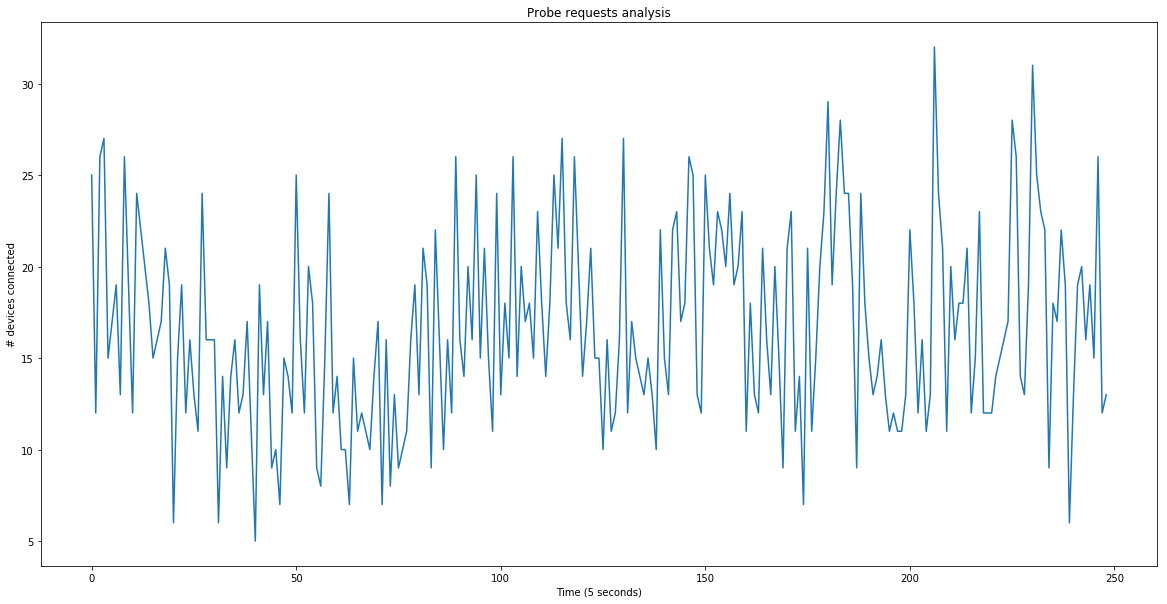

# Devices connected at a given time


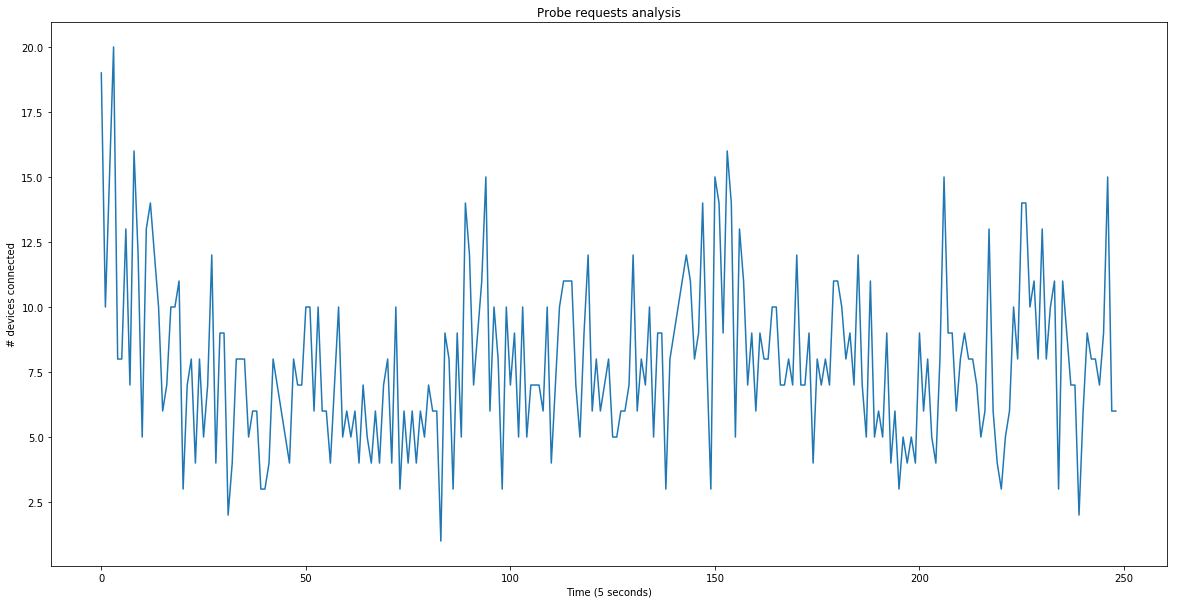

# Newly connected devices at a given time


In [65]:
#Chicago Airport Data

app = ProbeAnalysis("airport_chicago/probe_req.csv")
result = app.processData()
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

<h3> Warsaw Airport Data </h3>

Length of the period: 266
Total Number of Prob Requests: 3387


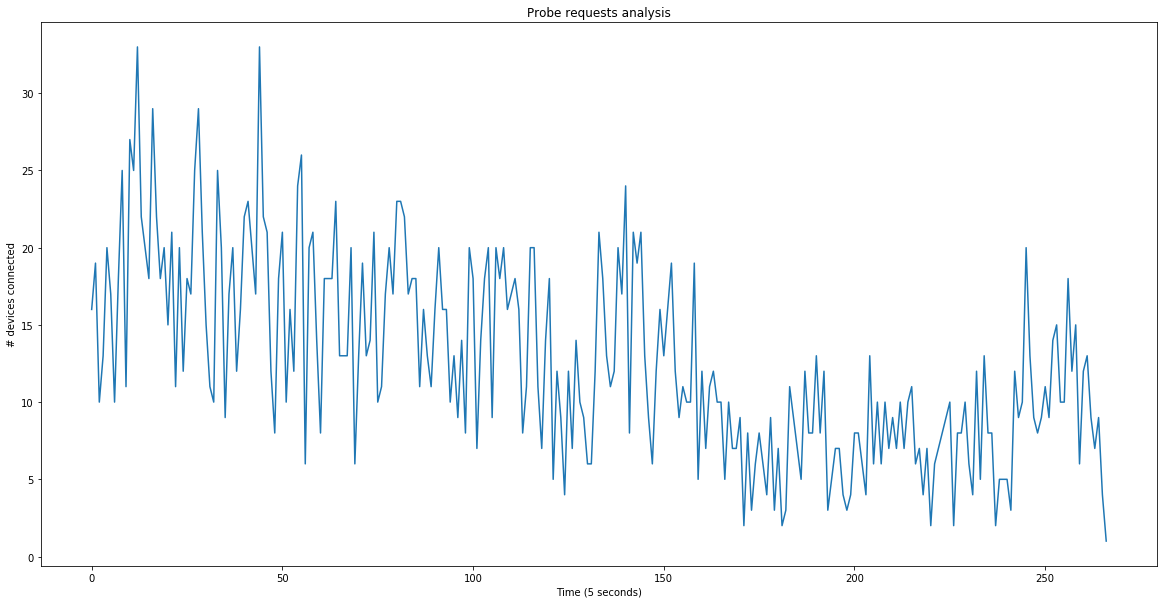

# Devices connected at a given time


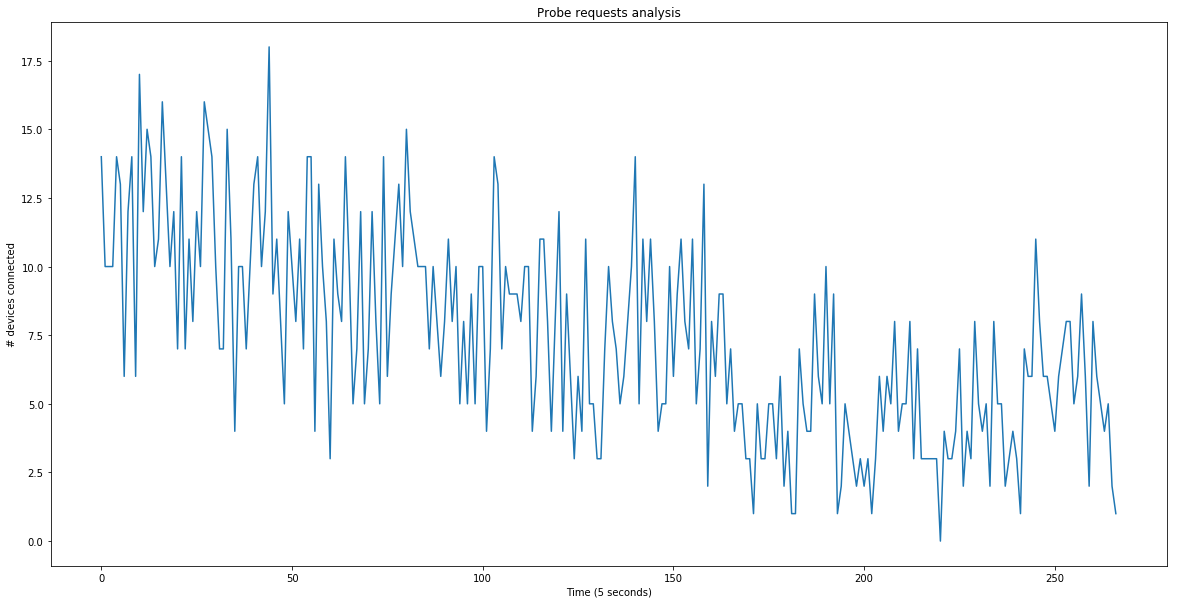

# Newly connected devices at a given time


In [66]:
#Warsaw Airport Data
app = ProbeAnalysis("airport_warsaw/probe_req.csv")
result = app.processData()
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

<h3> Downtown Chicago Data </h3>

Length of the period: 467
Total Number of Prob Requests: 10460


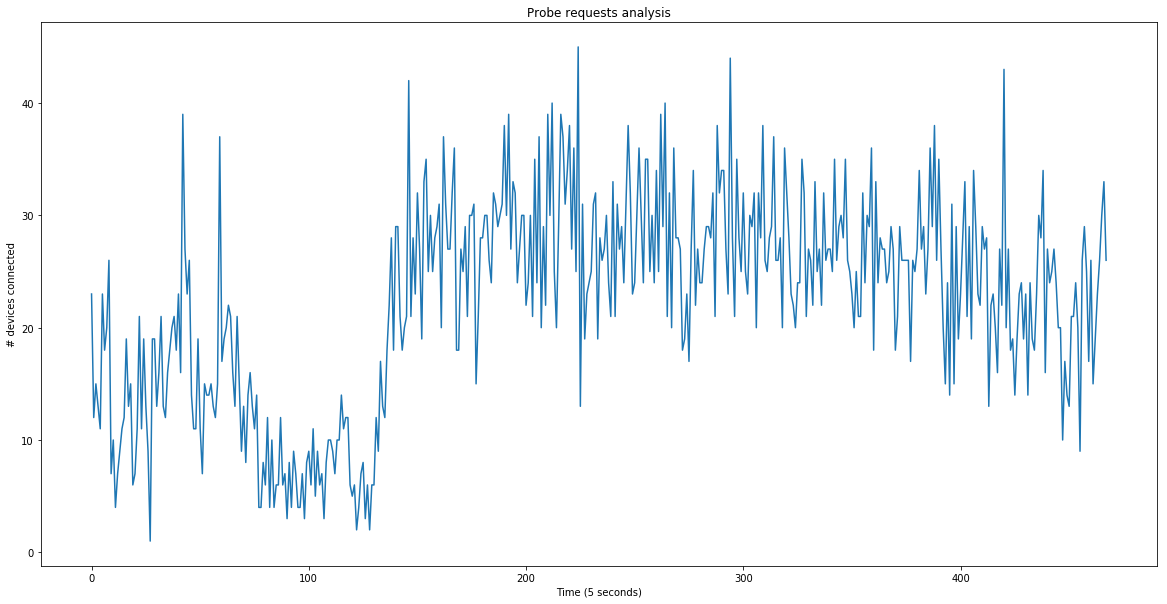

# Devices connected at a given time


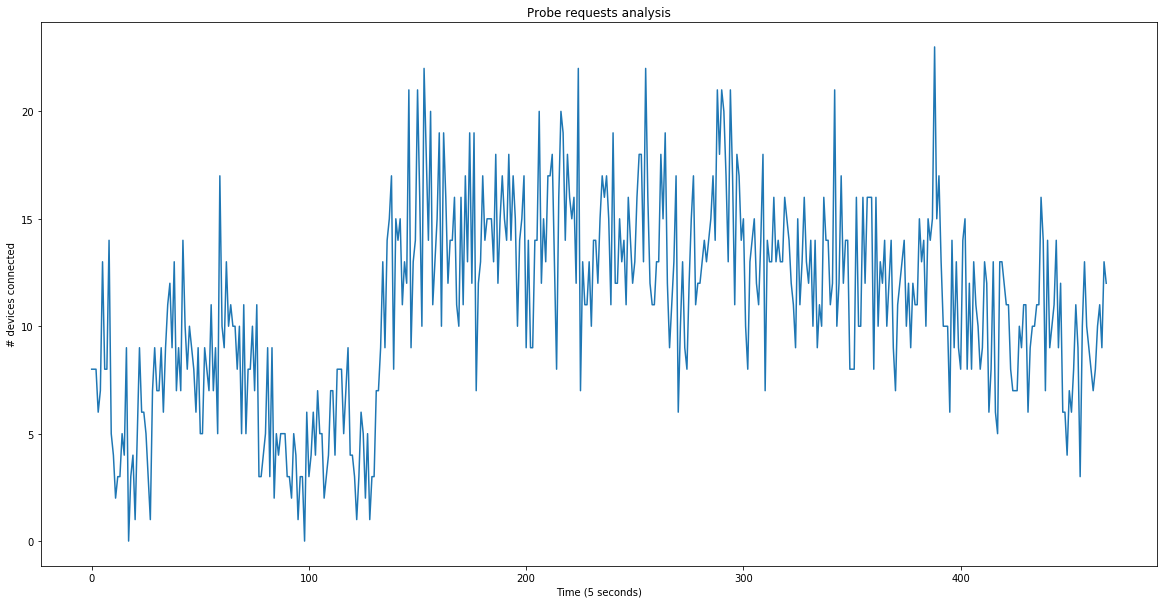

# Newly connected devices at a given time


In [67]:
#Downtown Chicago Data
app = ProbeAnalysis("downtown_chicago/probe_req.csv")
result = app.processData()
app.constructProbeAnalysis(result)
app.show()
print("# Devices connected at a given time")

app.constructMacAnalysis(result)
app.show()
print("# Newly connected devices at a given time")

<h3>Analysis</h3>

#TODO: Any comment on above result?

<div style="background-color:rgba(100, 160, 200, 0.33);">
<h2> Airport Probe Response </h2>

In [109]:
vendor = [['Cisco', 0],
          ['Ruckus', 0],
          ['ARRIS', 0],
          ['Netgear', 0],
          ['Ubiquiti', 0],
          ['ASUS', 0],
          ['Aruba', 0]]

def get_unique_list(file):
    ap_lst = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            ap_lst.append(row[2])
        #return Counter(ap_lst)
        
def create_histogram(list, ven):
    for v in ven:
        for i in list:
            if i.startswith(v[0]):
                v[1] += 1
    return ven

def plot_histogram2(lst):
    plt.figure(1,figsize=(10,5)) 
    
    y_pos = np.arange(len(lst))
    accesses = [x[1] for x in lst]
    
    plt.bar(y_pos, accesses, align='center', alpha=0.5) 
    plt.xticks(range(len(lst)), [x[0] for x in lst], size='medium')
 
    plt.xlabel('Device Vendor')
    plt.ylabel('# Probe Response')
    plt.title('Probe response per device vendor')
    plt.show()
    
def top_25():
    top25 = Counter(ap_lst).most_common(25)
    device = []
    freq = []
    for i in range(len(top25)):
        device.append(top25[i][0])
        freq.append(top25[i][1])

    plt.figure(1,figsize=(15,10)) 
    indices = np.arange(len(top25))
    plt.bar(indices, freq)
    plt.xticks(indices, device, rotation='vertical')
    plt.xlabel('Device')
    plt.ylabel('# Probe Response')
    plt.title('Probe response per device (Top 25)')
    plt.tight_layout()
    plt.show()

<h3> Chicago Airport Dataset </h3>

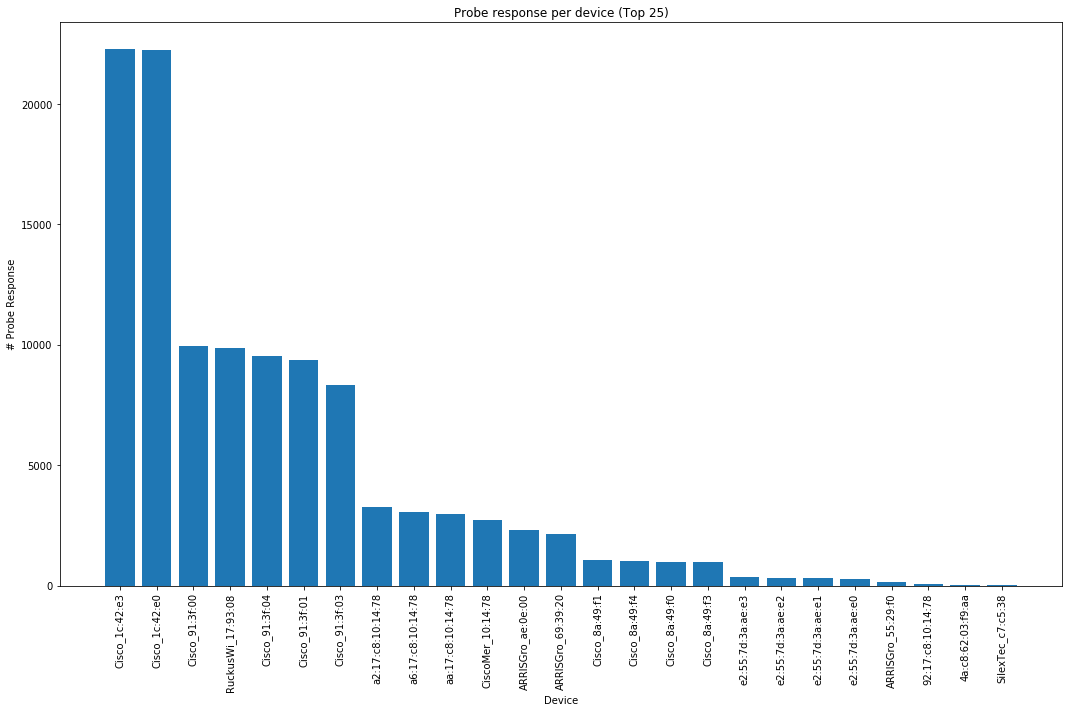

In [110]:
get_unique_list('airport_chicago/probe_res.csv')
hist_ap = create_histogram(ap_lst, vendor)
top_25()

In [111]:
print("Most active AP list")
print(top25)

Most active AP list
[('Cisco_1c:42:e3', 22268), ('Cisco_1c:42:e0', 22223), ('Cisco_91:3f:00', 9966), ('RuckusWi_17:93:08', 9881), ('Cisco_91:3f:04', 9526), ('Cisco_91:3f:01', 9374), ('Cisco_91:3f:03', 8344), ('a2:17:c8:10:14:78', 3272), ('a6:17:c8:10:14:78', 3055), ('aa:17:c8:10:14:78', 2957), ('CiscoMer_10:14:78', 2732), ('ARRISGro_ae:0e:00', 2286), ('ARRISGro_69:39:20', 2121), ('Cisco_8a:49:f1', 1042), ('Cisco_8a:49:f4', 1024), ('Cisco_8a:49:f0', 983), ('Cisco_8a:49:f3', 971), ('e2:55:7d:3a:ae:e3', 354), ('e2:55:7d:3a:ae:e2', 326), ('e2:55:7d:3a:ae:e1', 312), ('e2:55:7d:3a:ae:e0', 256), ('ARRISGro_55:29:f0', 138), ('92:17:c8:10:14:78', 49), ('4a:c8:62:03:f9:aa', 13), ('SilexTec_c7:c5:38', 10)]


Unique AP vendor list
[['Cisco', 88453], ['Ruckus', 9881], ['ARRIS', 4555], ['Netgear', 5], ['Ubiquiti', 0], ['ASUS', 0], ['Aruba', 0]]


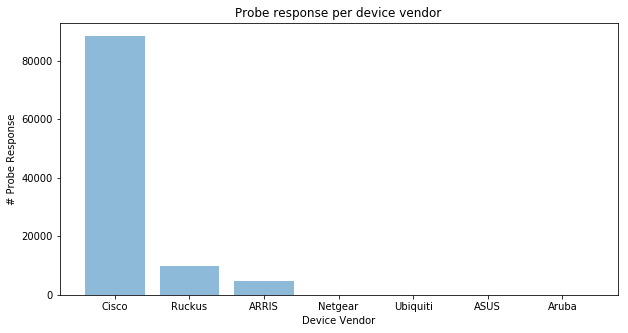

In [112]:
print("Unique AP vendor list")
print(hist_ap)

plot_histogram2(hist_ap)

<h3> Analysis </h3>

<p>  A few APs with a large amount of probes. A large set of mobile hotspots with a small number of probe responses. <p>